# Task sheet
## **Performed** on: 02 August 2020

# Load libraries

In [ ]:
# import libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

**1.a) Generate 8 columns containing 3 categorical labels in roughly equal proportion**

In [ ]:
np.random.seed(3141) # set random seed  for reproducibility
var_names = ['A', 'B', 'C'] # set random seed for reproducibility
data_np = np.random.choice(a=var_names, size=(50000, 8), p=[1/3, 1/3, 1/3]) # produce numpy array with data

**1. b.) Verify that the proportions of each value are similar for each of the eight columns**

In [ ]:
data_np.shape # check dimensions

(50000, 8)

In [ ]:
pd.DataFrame(data_np[:5]) # view first few rows, using pandas formatting

,0,1,2,3,4,5,6,7
0,A,B,B,C,C,A,A,C
1,C,B,A,C,C,C,B,B
2,B,A,B,C,C,B,C,B
3,C,A,B,A,B,B,B,A
4,C,B,B,A,B,C,B,B


In [ ]:
counts = pd.DataFrame(data_np).apply(pd.Series.value_counts) # use pandas value_counts to produce table counts
counts = counts.T # transpose table
counts

,A,B,C
0,16618,16725,16657
1,16607,16803,16590
2,16794,16601,16605
3,16732,16740,16528
4,16470,16884,16646
5,16606,16832,16562
6,16637,16637,16726
7,16486,16700,16814


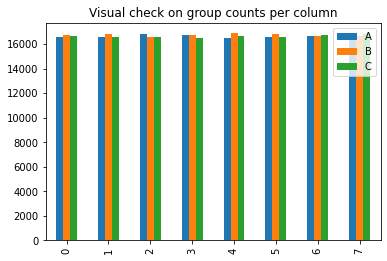

In [ ]:
ax=counts.plot.bar(title='Visual check on group counts per column') # plot counts for a visual check

**1 c.) How many unique rows (i.e., permutations of category levels) are possible?
This can be solved by generating a table containing the unique entries and determining how many rows there are.** 
* *The assumption made in this calculation is that two rows with the same entries but different orders are identical.*


Answer = **45**

In [ ]:
data_np.sort()
data_np_unique=np.unique(data_np, axis=0)
data_np_unique.shape

(45, 8)

**1.d) Write some code to produce a table and graph which show the frequencies (numbers
of groups) by permutation group sizes (up to group size of 10).**

In [ ]:
# prouct counts for each row
counts = [Counter(row) for row in data_np_unique]
counts[:5]

[Counter({'A': 8}),
 Counter({'A': 7, 'B': 1}),
 Counter({'A': 7, 'C': 1}),
 Counter({'A': 6, 'B': 2}),
 Counter({'A': 6, 'B': 1, 'C': 1})]

In [ ]:
# sort according to counts of each letter
# this generates a list of lists containing tuples 
# and requires a litte hacking to get into desired form .....

tuple_list = [sorted(x.items(), key = lambda i: i[1]) for x in counts]
tuple_list[:5]

[[('A', 8)],
 [('B', 1), ('A', 7)],
 [('C', 1), ('A', 7)],
 [('B', 2), ('A', 6)],
 [('B', 1), ('C', 1), ('A', 6)]]

In [ ]:
groups = [] #  generate a list containing just the counts
for tuple_entry in tuple_list:
    groups.append([number for (letter, number) in tuple_entry])

groups[:5] 

[[8], [1, 7], [1, 7], [2, 6], [1, 1, 6]]

In [ ]:
# apply the counter again to identify occurence of groups
# eg. a group containing all the same character will appear 3 times as there are 3 letters.
group_counts = Counter([tuple(i) for i in groups]) # must convert list to tuple to be compatible with Counter module
group_counts # this forms a dictionary structure that needs to be unpacked

Counter({(1, 1, 6): 3,
         (1, 2, 5): 6,
         (1, 3, 4): 6,
         (1, 7): 6,
         (2, 2, 4): 3,
         (2, 3, 3): 3,
         (2, 6): 6,
         (3, 5): 6,
         (4, 4): 3,
         (8,): 3})

In [ ]:
# place groups with names in a dataframe, and sort
Group_counts= pd.DataFrame({"group_names":[*group_counts.keys()], 
                            "group_values": [*group_counts.values()]})

Group_counts=Group_counts.sort_values(by="group_values")
Group_counts

,group_names,group_values
0,"(8,)",3
3,"(1, 1, 6)",3
6,"(4, 4)",3
8,"(2, 2, 4)",3
9,"(2, 3, 3)",3
1,"(1, 7)",6
2,"(2, 6)",6
4,"(3, 5)",6
5,"(1, 2, 5)",6
7,"(1, 3, 4)",6


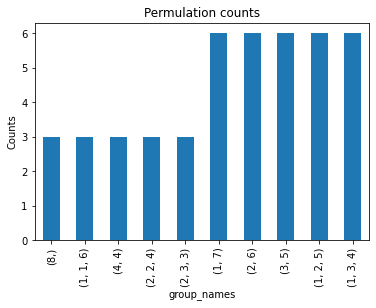

In [ ]:
ax= Group_counts.plot.bar(x='group_names', 
                          y='group_values', 
                          rot=90, 
                          legend=False, 
                          title = "Permulation counts")
ax=ax.set_ylabel("Counts")


**1 e.) Comment upon how group size is distributed in d).**

* The set is divided up into two group sizes, one double in size the other

**1 f.) If your random variables were, in fact, meaningful information on individuals, which
group sizes are of most concern from a privacy perspective?** 
* If the group has a small population size, it will make it increases the likelyhood that one could identify the original dataset.

**1 g.) Consider the effect of missing data in the dataset you created in Part a). How might
this complicate the production of a frequency table of group sizes in Part d)?
2**
* As the sparsity of the dataset increases, noise will occur and increases the danger of spurious correlations. For instance, studying covid19 fatalities with a section of individuals without gender, weight and certain comorbidities would produce a new group that would not fall into the current understanding of covid-19 risk factors

# Post code report

* Using the first three characters in the postcode produces a little more than 1000 outcomes and within this list, about 300 contain less than 20 000 residents. 
* If the key performance criteria is that each grouping should contain less than 20 000 residents, then **a third of the groups need to be re-assigned**
* Looking at the overall distribution of total number of residents, it could be called bi-modal with a large number of residents in a small number of locations. This would not be surprising given that the UK is demographically concentrated in a small number of population centres
* There is a resonable linear relationship between the number of residents and the occupied households, which is logically not unsurprising.
* Looking at the average gender-balance distribution, there are many locations with imbalanced proportions. Some figures have been calculated below showing how the numbers vary at the extreme end of the scale. The overall average picture gives a male population of 45% with modal points at 30% and 40%. Correspondingly, females centre at 32% with modal points at 28% and 20%. **Reassuringly, the percentage totals of men and women at each postcode all sum to >=99%.**
* Where there are high imbalances, you can see that they refer to locations with quite small populations. Lookingly singularly at this dataset would not enable one to see exactly where they refer to. This is a positive. If on the other hand, it is clear an individual comes from a location with a gender disparity of greater than 75%, this is information which can identify the full postcode. eg. at the top of the male/female lists: for males, CF356AP contains a hospital and for females, GL503EP contains a private girl's school.

In [ ]:
# obtain dataset
!wget www.nomisweb.co.uk/output/census/2011/Postcode_Estimates_Table_1.csv
!ls

--2020-08-02 10:40:51--  http://www.nomisweb.co.uk/output/census/2011/Postcode_Estimates_Table_1.csv
Resolving www.nomisweb.co.uk (www.nomisweb.co.uk)... 129.234.253.212
Connecting to www.nomisweb.co.uk (www.nomisweb.co.uk)|129.234.253.212|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27363860 (26M) [text/csv]
Saving to: ‘Postcode_Estimates_Table_1.csv’

Postcode_Estimates_ 100%[===================>]  26.10M   610KB/s    in 44s     

2020-08-02 10:41:37 (607 KB/s) - ‘Postcode_Estimates_Table_1.csv’ saved [27363860/27363860]

Postcode_Estimates_Table_1.csv	sample_data


In [ ]:
# read with pandas and view first few rows
df_postcodes = pd.read_csv("Postcode_Estimates_Table_1.csv")

# insert new column with shortened post codes
# convert male and female counts to percentages
df_postcodes.insert(1, "short_postcode", df_postcodes.Postcode.str[:3])
df_postcodes.Males= (100*df_postcodes.Males/df_postcodes.Total).apply(int)
df_postcodes.Females= (100*df_postcodes.Females/df_postcodes.Total).apply(int)
df_postcodes.head()

,Postcode,short_postcode,Total,Males,Females,Occupied_Households
0,AL1 1AG,AL1,14,42,57,6
1,AL1 1AJ,AL1,124,48,51,51
2,AL1 1AR,AL1,32,53,46,17
3,AL1 1AS,AL1,34,50,50,13
4,AL1 1BH,AL1,52,28,71,41


In [ ]:
# check the totals of male/female
Male_female_total = df_postcodes.Males+df_postcodes.Females
sum(Male_female_total<99)
sum(Male_female_total>100)

0

0

Number of rows in list:  1108
Number of groups with counts below 20K:  302 



short_postcode
N1C      7
B40      9
TD5     10
TW6     16
M17     17
W1C     48
DG1     65
M2      88
TD9    105
W1S    299
Name: Total, dtype: int64

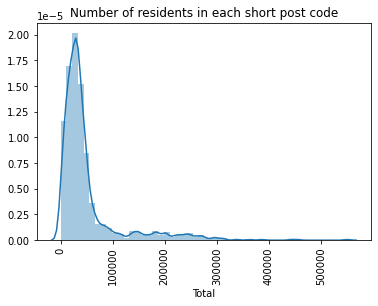

In [ ]:
# group by postcode and then sum the total number of residents
# X_ is a variable that can be re-used
X_ = df_postcodes.groupby("short_postcode")["Total"].sum().sort_values()
print("Number of rows in list: ", len(X)) # count how many rows
print("Number of groups with counts below 20K: ", sum(X<20000), "\n" ) # count how many rows
ax = sns.distplot(X_).set_title("Number of residents in each short post code")
plt.xticks(rotation=90)
X_[:10]

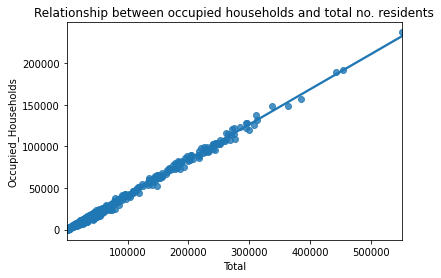

In [ ]:
X_1=df_postcodes.groupby("short_postcode")["Total"].sum()
X_2=df_postcodes.groupby("short_postcode")["Occupied_Households"].sum()
ax = sns.regplot(x=X_1, y=X_2).set_title("Relationship between occupied households and total no. residents")

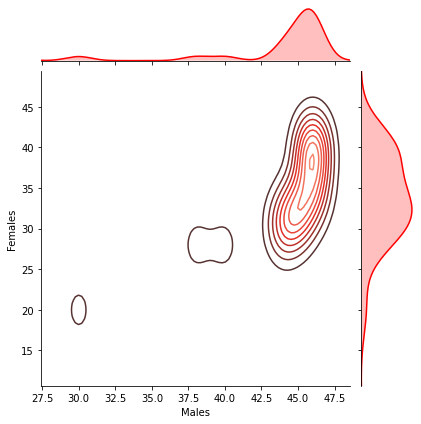

In [ ]:
# examine outliers at the top of the list of male/feamle proportions by average
X_1=df_postcodes.groupby("short_postcode")["Males"].mean().sort_values()[:20].apply(int)
X_2=df_postcodes.groupby("short_postcode")["Females"].mean().sort_values()[:20].apply(int)

g = sns.JointGrid(X_1, X_2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

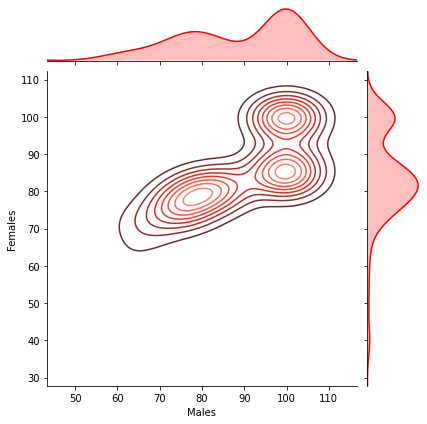

In [ ]:
# examine outliers at the top of the list of male/feamle proportions by maximum
X_1=df_postcodes.groupby("short_postcode")["Males"].max().sort_values()[:100].apply(int)
X_2=df_postcodes.groupby("short_postcode")["Females"].max().sort_values()[:100].apply(int)

g = sns.JointGrid(X_1, X_2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

In [ ]:
df_postcodes[df_postcodes.Males>75].sort_values(by="Total", ascending=False)[:20]

,Postcode,short_postcode,Total,Males,Females,Occupied_Households
177180,CF356AP,CF3,1340,99,0,0
226542,CO2 7SW,CO2,1302,91,8,0
419786,GU112BG,GU1,1262,86,13,0
317817,DL9 3JS,DL9,1245,99,0,0
1107703,SW183HR,SW1,1188,98,1,4
835303,PE280SR,PE2,1132,99,0,0
813962,OX183LX,OX1,1121,82,17,15
317773,DL9 3AB,DL9,1071,95,4,11
709693,NE615AZ,NE6,1070,99,0,4
1236463,WA3 6BP,WA3,1064,99,0,0


In [ ]:
df_postcodes[df_postcodes.Females>75].sort_values(by="Total", ascending=False)[:20]

,Postcode,short_postcode,Total,Males,Females,Occupied_Households
410388,GL503EP,GL5,667,1,98,1
456765,HP111PE,HP1,549,0,99,22
896035,RG189JJ,RG1,531,4,95,8
1152547,TN174AA,TN1,504,2,97,7
68175,BD146JX,BD1,504,0,99,3
165641,CB3 9DF,CB3,430,0,99,1
165478,CB3 0DF,CB3,379,2,97,0
540604,LA1 5AJ,LA1,379,0,99,0
1022022,SK9 4HR,SK9,337,0,99,2
646450,ME1 1HH,ME1,330,20,79,28
